In [11]:
%matplotlib inline 
#%load_ext autoreload 
%reload_ext autoreload
%autoreload 2
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

from __future__ import (division, 
                        print_function)

import os
import sys
import copy

import h5py
import numpy as np
import scipy
from scipy.interpolate import interp1d

from astropy.io import fits
from astropy import units as u
from astropy.stats import sigma_clip
from astropy.table import Table, Column
from astropy.utils.console import ProgressBar
from astropy.convolution import convolve, Box1DKernel


import matplotlib as mpl
import matplotlib.mlab as ml
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.patches import Ellipse
from matplotlib.ticker import NullFormatter, MaxNLocator, FormatStrFormatter
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
tickFormat = FormatStrFormatter('$\mathbf{%g}$') 
mpl.rcParams.update({'xtick.color': 'k'})
mpl.rcParams.update({'ytick.color': 'k'})
mpl.rcParams.update({'font.size': 20})

import cosmology
c=cosmology.Cosmo(H0=70.0, omega_m=0.3, omega_l=0.7, flat=1)


import sys
sys.path.append('/Users/RAJ/github/kungpao')
from kungpao.galsbp import galSBP
from kungpao.display import display_single, random_cmap
import statsmodels.api as sm
from scipy.interpolate import interp1d 
from kungpao import io
from kungpao import utils
from kungpao import detection
from kungpao import imtools

import sep
from palettable.colorbrewer.sequential import Greys_9, OrRd_9, Blues_9, Purples_9, YlGn_9
BLK = Greys_9.mpl_colormap
ORG = OrRd_9.mpl_colormap
BLU = Blues_9.mpl_colormap
GRN = YlGn_9.mpl_colormap

In [12]:
from pylab import figure, text, scatter, show

In [13]:
from pyraf import iraf

iraf.tables()
iraf.stsdas()
iraf.analysis()
iraf.isophote()

iraf.unlearn('ellipse')
iraf.unlearn('bmodel')

In [14]:
illustris_direc_high = '/Users/RAJ/summer_work_2018/notebook_tng/high_res'
illustris_direc_quick = '/Users/RAJ/summer_work_2018/notebook_tng/quick'
illustris_direc_metal = '/Users/RAJ/summer_work_2018/notebook_tng/high_res/metal'
illustris_direc_age = '/Users/RAJ/summer_work_2018/notebook_tng/high_res/age'

In [15]:
illustris_maps_high = np.load(os.path.join(illustris_direc_high,'illustris_high_maps.npy'))
illustris_maps_quick = np.load(os.path.join(illustris_direc_quick,'illustris_quick_maps.npy'))

In [16]:
illustris_maps_high_metalicity = np.load(os.path.join(illustris_direc_metal, 'Illustris_maps_high_metal.npy'))
illustris_maps_high_age = np.load(os.path.join(illustris_direc_age, 'Illustris_maps_high_age.npy'))


In [17]:
illustris_0_ell_high = np.load(os.path.join(illustris_direc_high,'illustris_0_ell_high.npy'))

In [18]:
illustris_ell_quick = np.load(os.path.join(illustris_direc_quick,'illustris_0_ell_quick.npy'))

In [19]:
illustris_high_file_hdf5='/Users/RAJ/summer_work_2018/notebook_tng/high_res/galaxies_tng100_072_agez_highres.hdf5'
illustris_quick_file_hdf5='/Users/RAJ/summer_work_2018/notebook_tng/quick/galaxies_tng100_072_agez_lowres.hdf5'

In [20]:
illustris_file = h5py.File(illustris_quick_file_hdf5, 'r')

In [21]:
def get_pixel_scale(file):
    f = h5py.File(file, 'r')
    map_size = f['config'].attrs['map_range_min']
    n_pixels = f['config'].attrs['map_npixel']
    pixel_scale=2 * (map_size/n_pixels)

    return pixel_scale

In [22]:
def get_ngalaxies(file):
    f = h5py.File(file, 'r')
    n_galaxies = len(f['catsh_id'])
    return n_galaxies

In [23]:
cat_sh_mstar=np.array(illustris_file['catsh_SubhaloMassType'][:, 4])
logms_cat = np.log10(cat_sh_mstar)

In [24]:
mask_bin1 = ((logms_cat >= 11.4) & (logms_cat < 11.5) )
mask_bin2 = ((logms_cat >= 11.5) & (logms_cat < 11.6)  )
mask_bin3 = ((logms_cat >= 11.6) & (logms_cat < 11.7)   )
mask_bin4 = ((logms_cat >= 11.7) & (logms_cat < 11.85) )
mask_bin5 = ((logms_cat >= 11.85) & (logms_cat < 12.4) )

In [25]:
high_bin_1 = (illustris_0_ell_high[mask_bin1])
high_bin_2 = illustris_0_ell_high[mask_bin2]
high_bin_3 = illustris_0_ell_high[mask_bin3]
high_bin_4 = illustris_0_ell_high[mask_bin4]
high_bin_5 = illustris_0_ell_high[mask_bin5]

In [26]:
mass_high_bin_1_maps = (illustris_maps_high[mask_bin1])
mass_high_bin_2_maps = illustris_maps_high[mask_bin2]
mass_high_bin_3_maps = illustris_maps_high[mask_bin3]
mass_high_bin_4_maps = illustris_maps_high[mask_bin4]
mass_high_bin_5_maps = illustris_maps_high[mask_bin5]

In [27]:
age_high_bin_1_maps = (illustris_maps_high_age[mask_bin1])
age_high_bin_2_maps = illustris_maps_high_age[mask_bin2]
age_high_bin_3_maps = illustris_maps_high_age[mask_bin3]
age_high_bin_4_maps = illustris_maps_high_age[mask_bin4]
age_high_bin_5_maps = illustris_maps_high_age[mask_bin5]

In [28]:
metal_high_bin_1_maps = (illustris_maps_high_metalicity[mask_bin1])
metal_high_bin_2_maps = illustris_maps_high_metalicity[mask_bin2]
metal_high_bin_3_maps = illustris_maps_high_metalicity[mask_bin3]
metal_high_bin_4_maps = illustris_maps_high_metalicity[mask_bin4]
metal_high_bin_5_maps = illustris_maps_high_metalicity[mask_bin5]

In [29]:
def generate_profiles(image_map,mass_map,ell_file,type_,pixel_scale):
    x0 = ell_file[type_]['x0'][1:]
    y0 = ell_file[type_]['y0'][1:]
    theta = ell_file[type_]['pa'][1:] * np.pi / 180.0
    a = ell_file[type_]['sma'][1:]  * (1.0 - ell_file[type_]['ell'][1:])
    b = ell_file[type_]['sma'][1:] 
    img_to_extract = image_map
    img_mass = mass_map * pixel_scale
    m,n = img_to_extract.shape
    sma= []
    std_arr = []
    mean_arr = [] 
    for i in range(len(x0)-25): 
        mask_inner = np.zeros((m,n), dtype=np.bool)
        mask_outer = np.zeros((m,n), dtype=np.bool)
        sep.mask_ellipse(mask_inner, x0[i+20], y0[i+20], a[i+20], b[i+20], theta[i+20])
        sep.mask_ellipse(mask_outer, x0[i+25], y0[i+25], a[i+25], b[i+25], theta[i+25])
        pixels_in_mask = (np.multiply(img_to_extract, np.logical_and(mask_outer, ~mask_inner)))
        mass_weights = (np.multiply(img_mass, np.logical_and(mask_outer, ~mask_inner)))
        mean = np.average(pixels_in_mask[pixels_in_mask > 0.],weights = mass_weights[pixels_in_mask > 0.] )
        #std = np.nanstd(pixels_in_mask[pixels_in_mask > 0.] * mass_weights[pixels_in_mask > 0])
        sma.append(( b[i+20]+ b[i+25])/2)
        #std_arr.append(std)
        mean_arr.append(mean)
    return np.array(sma),np.array(mean_arr)

# This is one of the galaxy that doesnot work

In [85]:
a1,b1 = generate_profiles(metal_high_bin_1_maps[6][1],mass_high_bin_1_maps[6][1],high_bin_1[6],'ell_ins_3',1.0)

ZeroDivisionError: Weights sum to zero, can't be normalized

In [87]:
a1,b1 = generate_profiles(metal_high_bin_3_maps[0][1],mass_high_bin_3_maps[0][1],high_bin_3[0],'ell_ins_3',1.0)
a1,b1 = generate_profiles(metal_high_bin_3_maps[2][1],mass_high_bin_3_maps[2][1],high_bin_3[0],'ell_ins_3',1.0)
a1,b1 = generate_profiles(metal_high_bin_3_maps[4][1],mass_high_bin_3_maps[4][1],high_bin_3[0],'ell_ins_3',1.0)

ZeroDivisionError: Weights sum to zero, can't be normalized

/Users/RAJ/anaconda/envs/illustris_profiles/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
/Users/RAJ/anaconda/envs/illustris_profiles/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide


[]

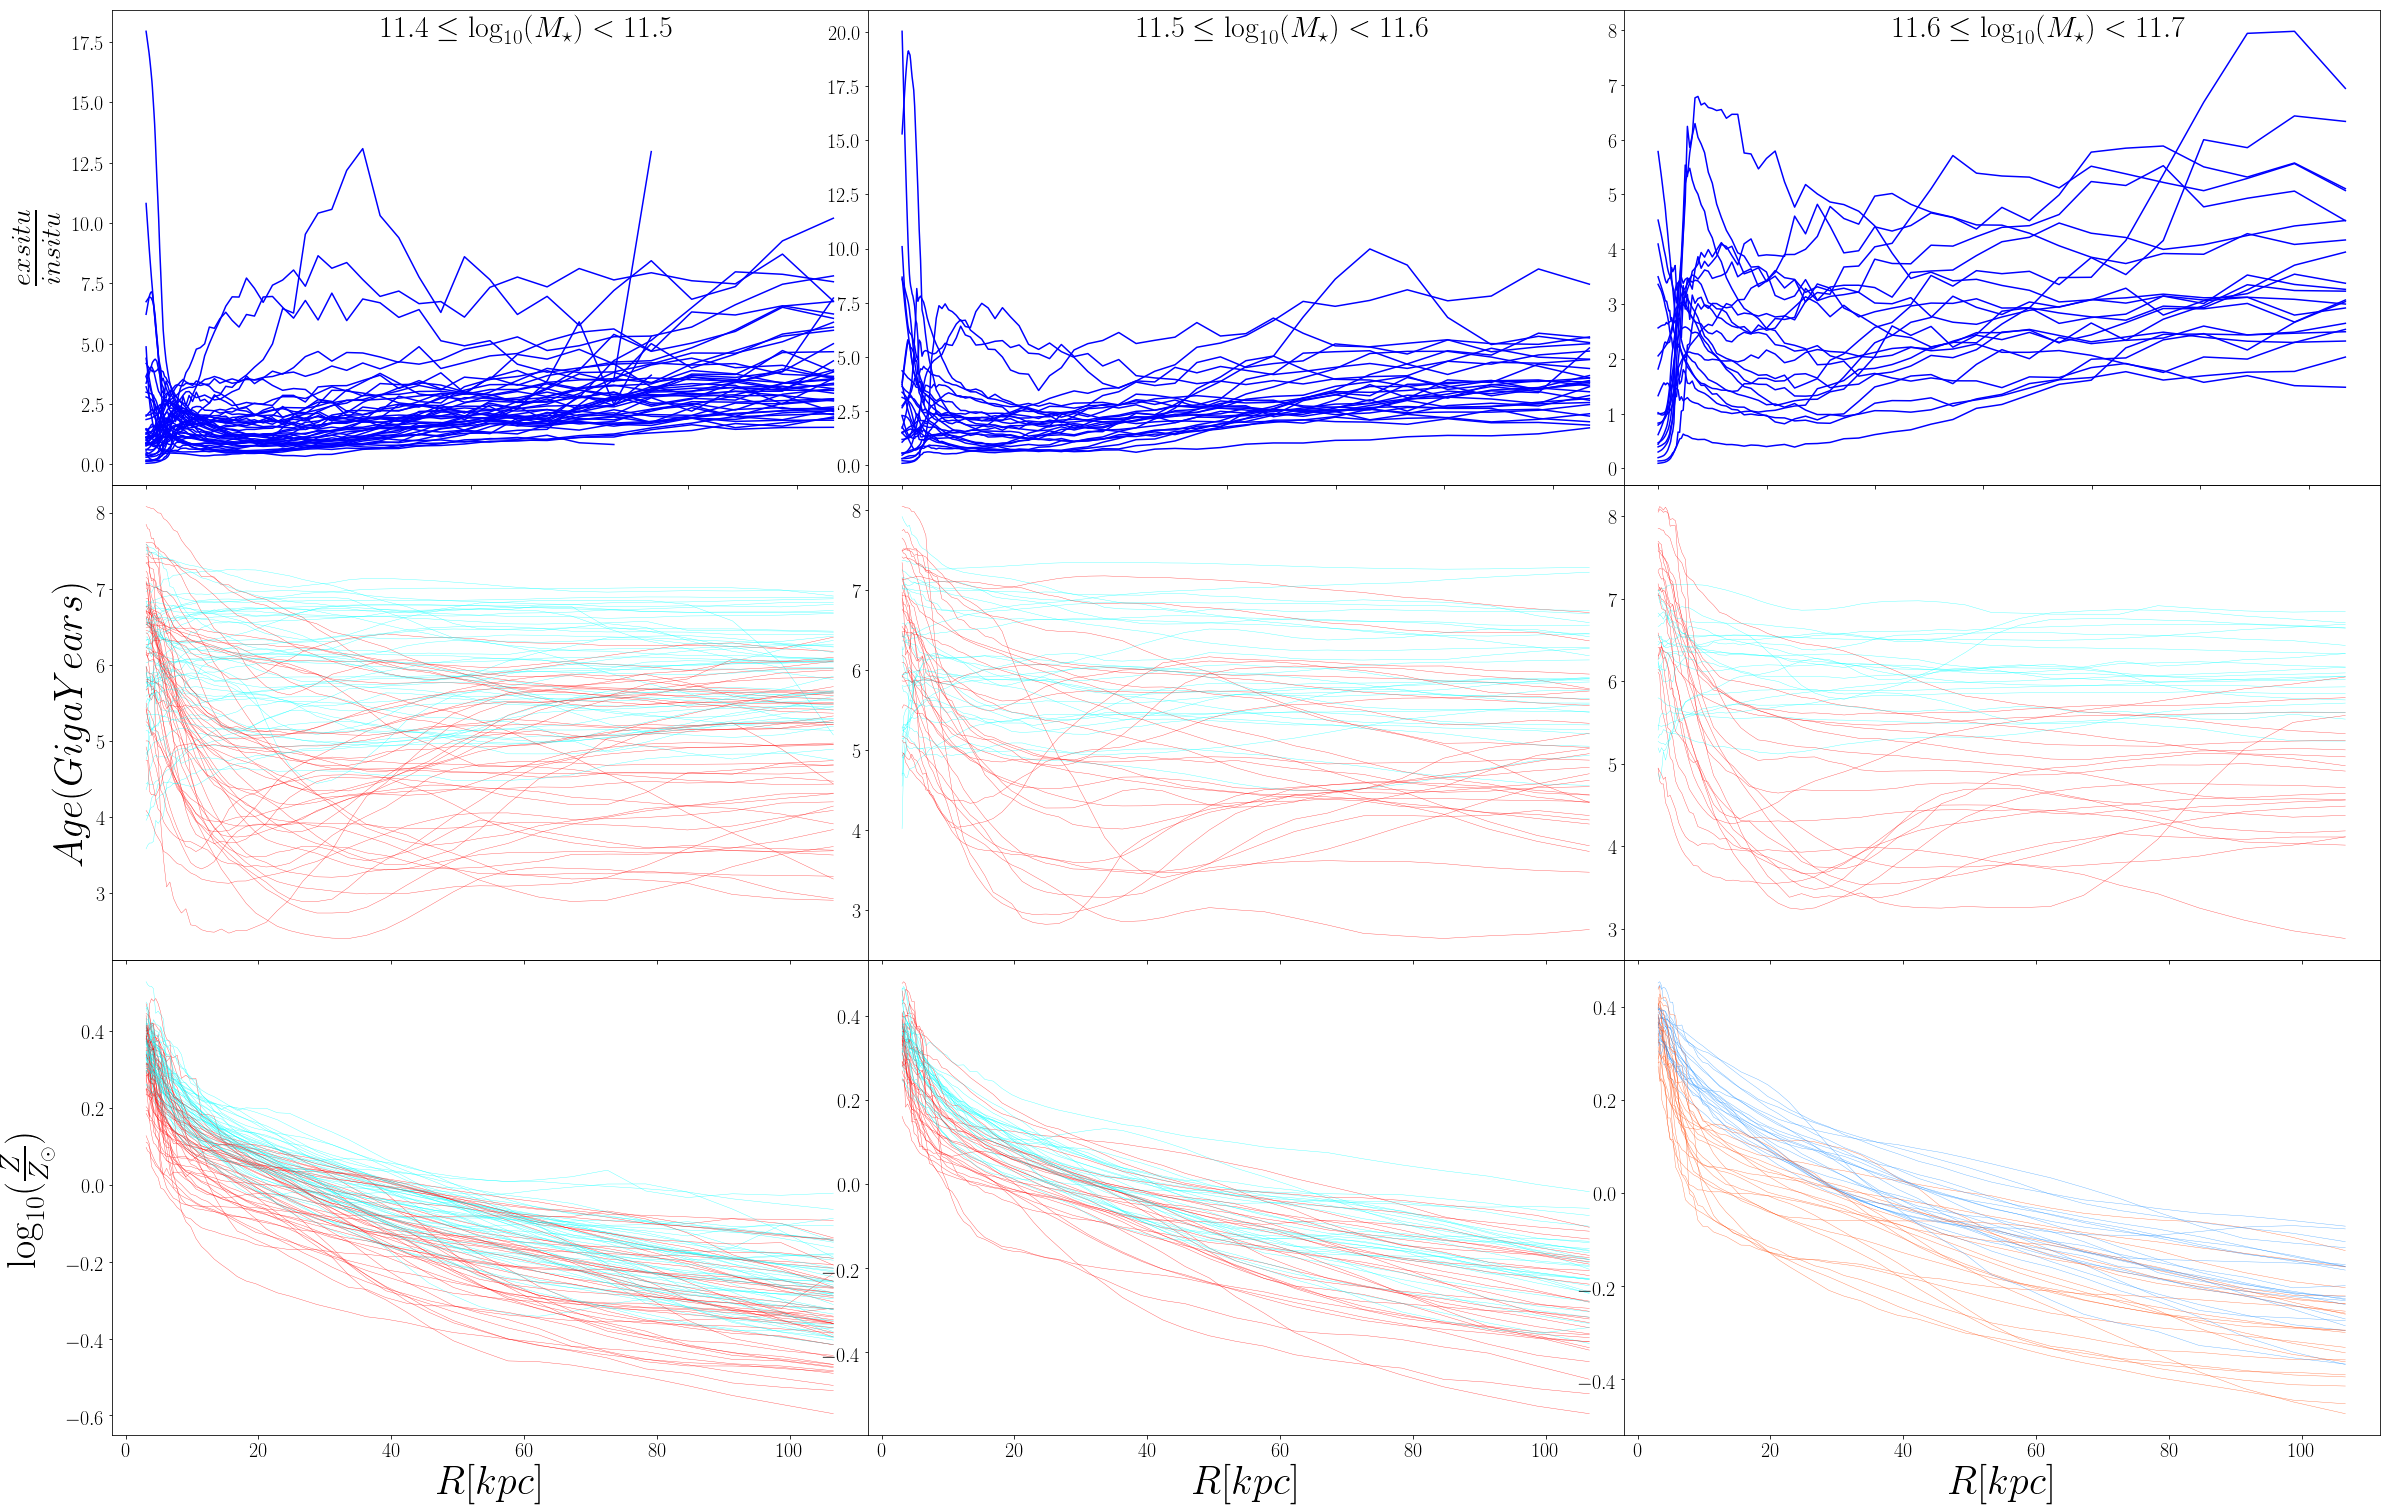

In [84]:
fig = plt.figure(figsize=(35, 22))
ax1 = plt.axes([0.1,0.25,0.3,0.3])
ax11 = plt.axes([0.1,0.55,0.3,0.3])
ax111 = plt.axes([0.1,0.85,0.3,0.3])
ax2 = plt.axes([0.4,0.25,0.3,0.3])
ax22 = plt.axes([0.4,0.55,0.3,0.3])
ax222 = plt.axes([0.4,0.85,0.3,0.3])
ax3 = plt.axes([0.7,0.25,0.3,0.3])
ax33 = plt.axes([0.7,0.55,0.3,0.3])
ax333 = plt.axes([0.7,0.85,0.3,0.3])

for i in range(len(metal_high_bin_1_maps)):
    if i != 6:
        a1,b1 = generate_profiles(metal_high_bin_1_maps[i][1],mass_high_bin_1_maps[i][1],high_bin_1[i],'ell_ins_3',1.0)
        a11,b11 = generate_profiles(metal_high_bin_1_maps[i][2],mass_high_bin_1_maps[i][2],high_bin_1[i],'ell_exs_3',1.0)
        b11 = np.array(b11)
        b1 = np.array(b1)
        ax1.plot((a1),np.log10(b1/0.0134),label = 'metallicity',color = 'r',linewidth = 0.4,alpha = 0.7)
        ax1.plot((a11),np.log10(b11/0.0134),label = 'metallicity',color = 'cyan',linewidth = 0.4,alpha = 0.7)
        
ax1.set_ylabel(r'$ \log_{10}(\frac{Z}{Z_{\odot}}) $',fontsize = 40)
ax1.set_xlabel(r'$ R[kpc] $',fontsize = 40)

for i in range(len(metal_high_bin_1_maps)):
    if i != 6: # this is because 6 was problematic
        a1,b1 = generate_profiles(age_high_bin_1_maps[i][1],mass_high_bin_1_maps[i][1],high_bin_1[i],'ell_ins_3',1.0)
        #a2,b2,c2 = generate_profiles(age_high_bin_1_maps[i][1],high_bin_1[i],'ell_ins_3')
        a11,b11 = generate_profiles(age_high_bin_1_maps[i][2],mass_high_bin_1_maps[i][2],high_bin_1[i],'ell_exs_3',1.0)
        #a22,b22,c22 = generate_profiles(age_high_bin_1_maps[i][2],high_bin_1[i],'ell_exs_3')
        b1 = np.array(b1)
        b11 = np.array(b11)
        ax11.plot((a1),b1,color = 'r',linewidth = 0.4,alpha = 0.7)
        ax11.plot((a11),b11,color = 'cyan',linewidth = 0.4,alpha = 0.7)
ax11.set_ylabel(r'$ Age (Giga Years) $',fontsize = 40)


for i in range(len(metal_high_bin_1_maps)):
    if i != 6: # this is because 6 was problematic
        ax111.plot((illustris_0_ell_high[mask_bin1][i]['ell_ins_3']['sma']),illustris_0_ell_high[mask_bin1][i]['ell_exs_3']['intens']/illustris_0_ell_high[mask_bin1][i]['ell_ins_3']['intens'],color = 'blue')
ax111.set_ylabel(r'$ \frac{exsitu}{insitu} $',fontsize = 40)

text(0.55, 0.95,'$11.4 \leq \log_{10 }(M_{\star})<11.5$',fontsize= 30,
     horizontalalignment='center',
     verticalalignment='center',transform=ax111.transAxes)
ax111.set_xticklabels([])
ax11.set_xticklabels([])


for i in range(len(metal_high_bin_2_maps)):
   
    a1,b1 = generate_profiles(metal_high_bin_2_maps[i][1],mass_high_bin_2_maps[i][1],high_bin_2[i],'ell_ins_3',1.0)
    a11,b11 = generate_profiles(metal_high_bin_2_maps[i][2],mass_high_bin_2_maps[i][2],high_bin_2[i],'ell_exs_3',1.0)
    b11 = np.array(b11)
    b1 = np.array(b1)
    ax2.plot((a1),np.log10(b1/0.0134),label = 'metallicity',color = 'r',linewidth = 0.4,alpha = 0.7)
    ax2.plot((a11),np.log10(b11/0.0134),label = 'metallicity',color = 'cyan',linewidth = 0.4,alpha = 0.7)
        

ax2.set_xlabel(r'$ R[kpc] $',fontsize = 40)

for i in range(len(metal_high_bin_2_maps)):
    
    a1,b1 = generate_profiles(age_high_bin_2_maps[i][1],mass_high_bin_2_maps[i][1],high_bin_2[i],'ell_ins_3',1.0)
    #a2,b2,c2 = generate_profiles(age_high_bin_1_maps[i][1],high_bin_1[i],'ell_ins_3')
    a11,b11 = generate_profiles(age_high_bin_2_maps[i][2],mass_high_bin_2_maps[i][2],high_bin_2[i],'ell_exs_3',1.0)
    #a22,b22,c22 = generate_profiles(age_high_bin_1_maps[i][2],high_bin_1[i],'ell_exs_3')
    b1 = np.array(b1)
    b11 = np.array(b11)
    ax22.plot((a1),b1,color = 'r',linewidth = 0.4,alpha = 0.7)
    ax22.plot((a11),b11,color = 'cyan',linewidth = 0.4,alpha = 0.7)



for i in range(len(metal_high_bin_2_maps)):
     #this is because 6 was problematic
    ax222.plot((illustris_0_ell_high[mask_bin2][i]['ell_ins_3']['sma']),illustris_0_ell_high[mask_bin2][i]['ell_exs_3']['intens']/illustris_0_ell_high[mask_bin2][i]['ell_ins_3']['intens'],color = 'blue')


text(0.55, 0.95,'$11.5 \leq \log_{10 }(M_{\star})<11.6$',fontsize= 30,
     horizontalalignment='center',
     verticalalignment='center',transform=ax222.transAxes)
ax222.set_xticklabels([])
ax22.set_xticklabels([])


for i in range(len(metal_high_bin_3_maps)):
    if (i != 0) and (i != 2) and (i != 4): 
   
        a1,b1 = generate_profiles(metal_high_bin_3_maps[i][1],mass_high_bin_3_maps[i][1],high_bin_3[i],'ell_ins_3',1.0)
        a11,b11 = generate_profiles(metal_high_bin_3_maps[i][2],mass_high_bin_3_maps[i][2],high_bin_3[i],'ell_exs_3',1.0)
        b11 = np.array(b11)
        b1 = np.array(b1)
        ax3.plot((a1),np.log10(b1/0.0134),label = 'metallicity',color = 'orangered',linewidth = 0.4,alpha = 0.7)
        ax3.plot((a11),np.log10(b11/0.0134),label = 'metallicity',color = 'dodgerblue',linewidth = 0.4,alpha = 0.7)
        

ax3.set_xlabel(r'$ R[kpc] $',fontsize = 40)

for i in range(len(metal_high_bin_3_maps)):
    if (i != 0) and (i != 2) and (i != 4): 
    
        a1,b1 = generate_profiles(age_high_bin_3_maps[i][1],mass_high_bin_3_maps[i][1],high_bin_3[i],'ell_ins_3',1.0)
        #a2,b2,c2 = generate_profiles(age_high_bin_1_maps[i][1],high_bin_1[i],'ell_ins_3')
        a11,b11 = generate_profiles(age_high_bin_3_maps[i][2],mass_high_bin_3_maps[i][2],high_bin_3[i],'ell_exs_3',1.0)
        #a22,b22,c22 = generate_profiles(age_high_bin_1_maps[i][2],high_bin_1[i],'ell_exs_3')
        b1 = np.array(b1)
        b11 = np.array(b11)
        ax33.plot((a1),b1,color = 'r',linewidth = 0.4,alpha = 0.7)
        ax33.plot((a11),b11,color = 'cyan',linewidth = 0.4,alpha = 0.7)



for i in range(len(metal_high_bin_3_maps)):
    if (i != 0) and (i != 2) and (i != 4): 
     #this is because 6 was problematic
        ax333.plot((illustris_0_ell_high[mask_bin3][i]['ell_ins_3']['sma']),illustris_0_ell_high[mask_bin3][i]['ell_exs_3']['intens']/illustris_0_ell_high[mask_bin3][i]['ell_ins_3']['intens'],color = 'blue')


text(0.55, 0.95,'$11.6 \leq \log_{10 }(M_{\star})<11.7$',fontsize= 30,
     horizontalalignment='center',
     verticalalignment='center',transform=ax333.transAxes)
ax333.set_xticklabels([])
ax33.set_xticklabels([])



[]

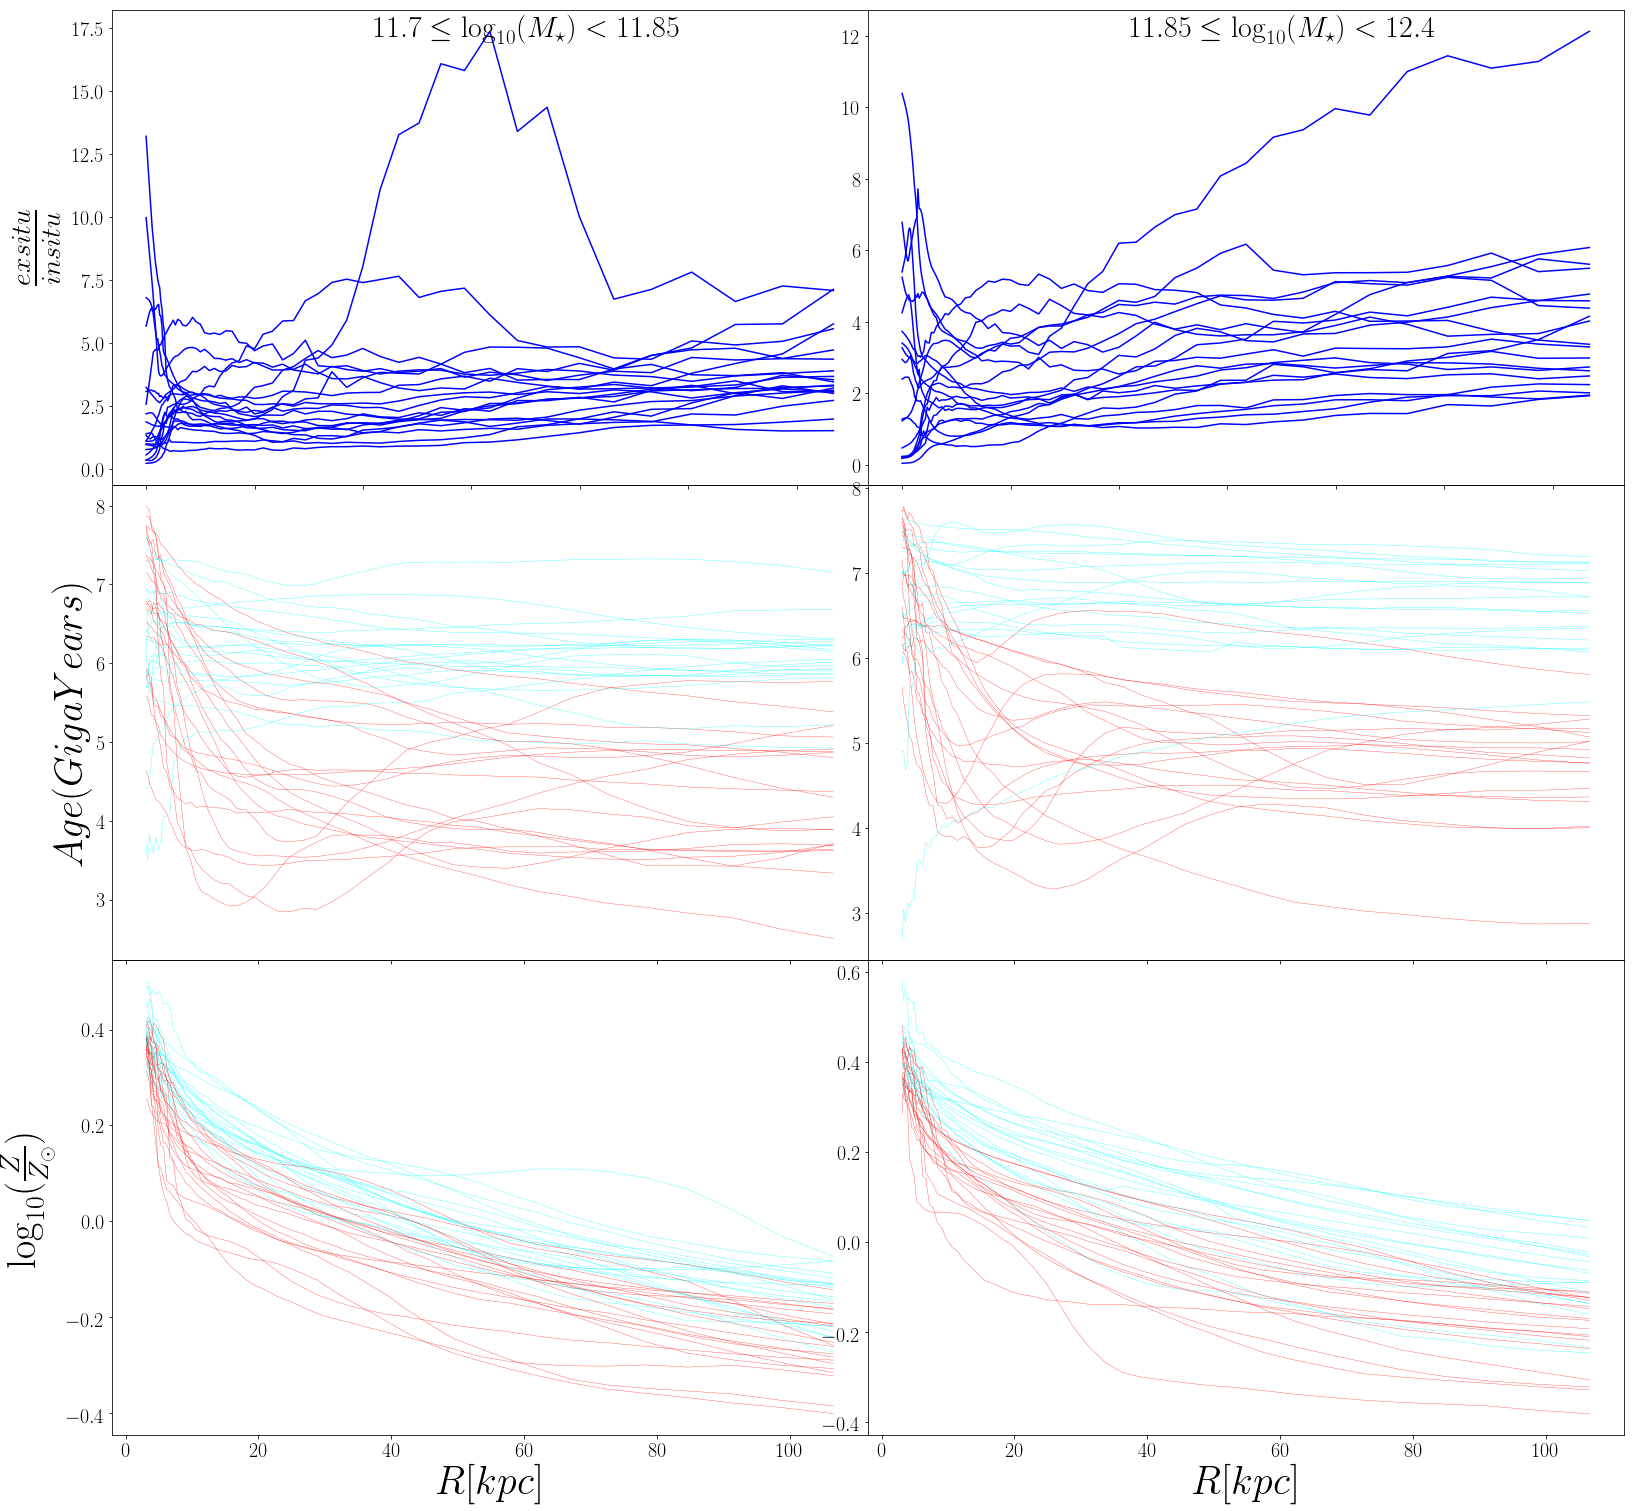

In [82]:
fig = plt.figure(figsize=(35, 22))
ax1 = plt.axes([0.1,0.25,0.3,0.3])
ax11 = plt.axes([0.1,0.55,0.3,0.3])
ax111 = plt.axes([0.1,0.85,0.3,0.3])
ax2 = plt.axes([0.4,0.25,0.3,0.3])
ax22 = plt.axes([0.4,0.55,0.3,0.3])
ax222 = plt.axes([0.4,0.85,0.3,0.3])

for i in range(len(metal_high_bin_4_maps)):
   
    a1,b1 = generate_profiles(metal_high_bin_4_maps[i][1],mass_high_bin_4_maps[i][1],high_bin_4[i],'ell_ins_3',1.0)
    a11,b11 = generate_profiles(metal_high_bin_4_maps[i][2],mass_high_bin_4_maps[i][2],high_bin_4[i],'ell_exs_3',1.0)
    b11 = np.array(b11)
    b1 = np.array(b1)
    ax1.plot((a1),np.log10(b1/0.0134),label = 'metallicity',color = 'r',linewidth = 0.4,alpha = 0.7)
    ax1.plot((a11),np.log10(b11/0.0134),label = 'metallicity',color = 'cyan',linewidth = 0.4,alpha = 0.7)
        

ax2.set_xlabel(r'$ R[kpc] $',fontsize = 40)

for i in range(len(metal_high_bin_4_maps)):
    
    a1,b1 = generate_profiles(age_high_bin_4_maps[i][1],mass_high_bin_4_maps[i][1],high_bin_4[i],'ell_ins_3',1.0)
    #a2,b2,c2 = generate_profiles(age_high_bin_1_maps[i][1],high_bin_1[i],'ell_ins_3')
    a11,b11 = generate_profiles(age_high_bin_4_maps[i][2],mass_high_bin_4_maps[i][2],high_bin_4[i],'ell_exs_3',1.0)
    #a22,b22,c22 = generate_profiles(age_high_bin_1_maps[i][2],high_bin_1[i],'ell_exs_3')
    b1 = np.array(b1)
    b11 = np.array(b11)
    ax11.plot((a1),b1,color = 'r',linewidth = 0.4,alpha = 0.7)
    ax11.plot((a11),b11,color = 'cyan',linewidth = 0.4,alpha = 0.7)



for i in range(len(metal_high_bin_4_maps)):
     #this is because 6 was problematic
    ax111.plot((illustris_0_ell_high[mask_bin4][i]['ell_ins_3']['sma']),illustris_0_ell_high[mask_bin4][i]['ell_exs_3']['intens']/illustris_0_ell_high[mask_bin4][i]['ell_ins_3']['intens'],color = 'blue')


text(0.55, 0.95,'$11.7 \leq \log_{10 }(M_{\star})<11.85$',fontsize= 30,
     horizontalalignment='center',
     verticalalignment='center',transform=ax111.transAxes)
ax111.set_xticklabels([])
ax11.set_xticklabels([])

ax1.set_ylabel(r'$ \log_{10}(\frac{Z}{Z_{\odot}}) $',fontsize = 40)
ax1.set_xlabel(r'$ R[kpc] $',fontsize = 40)
ax11.set_ylabel(r'$ Age (Giga Years) $',fontsize = 40)
ax111.set_ylabel(r'$ \frac{exsitu}{insitu} $',fontsize = 40)

for i in range(len(metal_high_bin_5_maps)):
   
    a1,b1 = generate_profiles(metal_high_bin_5_maps[i][1],mass_high_bin_5_maps[i][1],high_bin_5[i],'ell_ins_3',1.0)
    a11,b11 = generate_profiles(metal_high_bin_5_maps[i][2],mass_high_bin_5_maps[i][2],high_bin_5[i],'ell_exs_3',1.0)
    b11 = np.array(b11)
    b1 = np.array(b1)
    ax2.plot((a1),np.log10(b1/0.0134),label = 'metallicity',color = 'r',linewidth = 0.4,alpha = 0.7)
    ax2.plot((a11),np.log10(b11/0.0134),label = 'metallicity',color = 'cyan',linewidth = 0.4,alpha = 0.7)
        

ax2.set_xlabel(r'$ R[kpc] $',fontsize = 40)

for i in range(len(metal_high_bin_5_maps)):
    
    a1,b1 = generate_profiles(age_high_bin_5_maps[i][1],mass_high_bin_5_maps[i][1],high_bin_5[i],'ell_ins_3',1.0)
    #a2,b2,c2 = generate_profiles(age_high_bin_1_maps[i][1],high_bin_1[i],'ell_ins_3')
    a11,b11 = generate_profiles(age_high_bin_5_maps[i][2],mass_high_bin_5_maps[i][2],high_bin_5[i],'ell_exs_3',1.0)
    #a22,b22,c22 = generate_profiles(age_high_bin_1_maps[i][2],high_bin_1[i],'ell_exs_3')
    b1 = np.array(b1)
    b11 = np.array(b11)
    ax22.plot((a1),b1,color = 'r',linewidth = 0.4,alpha = 0.7)
    ax22.plot((a11),b11,color = 'cyan',linewidth = 0.4,alpha = 0.7)



for i in range(len(metal_high_bin_5_maps)):
     #this is because 6 was problematic
    ax222.plot((illustris_0_ell_high[mask_bin5][i]['ell_ins_3']['sma']),illustris_0_ell_high[mask_bin5][i]['ell_exs_3']['intens']/illustris_0_ell_high[mask_bin5][i]['ell_ins_3']['intens'],color = 'blue')


text(0.55, 0.95,'$11.85 \leq \log_{10 }(M_{\star})<12.4$',fontsize= 30,
     horizontalalignment='center',
     verticalalignment='center',transform=ax222.transAxes)
ax222.set_xticklabels([])
ax22.set_xticklabels([])
